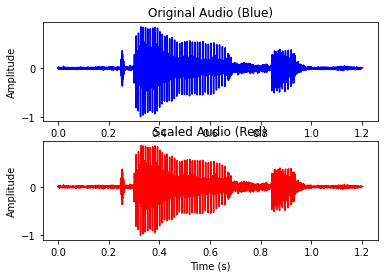

In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file

file_path = 'D:\TUNI\Time series\Kuusi.wav'

Fs, y = wavfile.read(file_path)

# Convert to double
y = y.astype(float)

# Remove mean
y = y - np.mean(y)

# Scale to -1 to 1
y = y / np.max(np.abs(y))

# Plot the original and scaled waveforms
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / Fs, y, 'b')
plt.title('Original Audio (Blue)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y)) / Fs, y, 'r')
plt.title('Scaled Audio (Red)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Show the plots
plt.show()


Playing audio at 8000 Hz...
Playing audio at 4000 Hz...
Playing audio at 2000 Hz...
Playing audio at 1000 Hz...


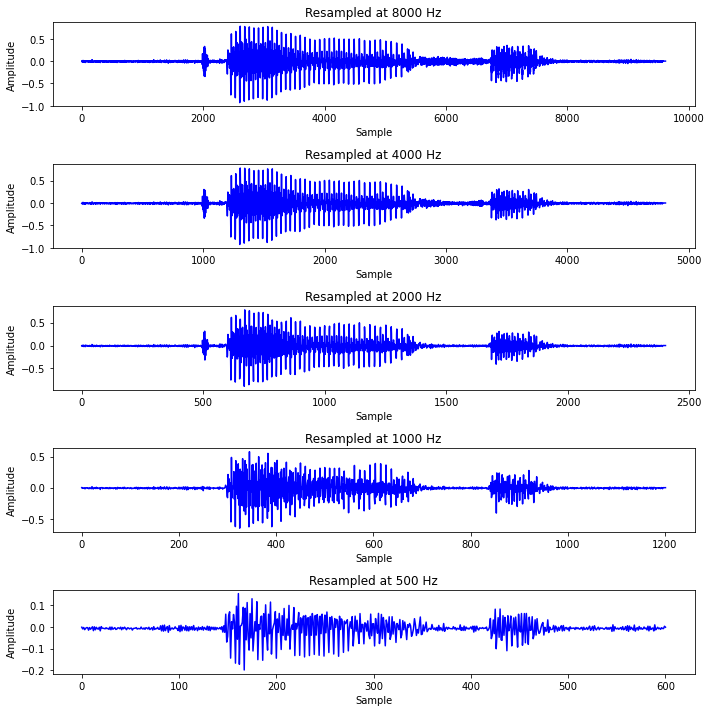

In [4]:
import librosa
import sounddevice as sd  # for audio playback
import matplotlib.pyplot as plt

# Load the audio file
# audio_file = 'Kuusi.wav'
y, sr = librosa.load(file_path, sr=None)  # Load with original sample rate

# List of sample rates to test
sample_rates_to_test = [8000, 4000, 2000, 1000, 500]

# Create a figure for the plots
plt.figure(figsize=(10, 10))

# Iterate through sample rates and plot/analyze the audio
for i, sr_to_test in enumerate(sample_rates_to_test):
    # Resample the audio
    y_resampled = librosa.resample(y, orig_sr=sr, target_sr=sr_to_test)

    # Plot the resampled audio
    plt.subplot(len(sample_rates_to_test), 1, i + 1)
    plt.plot(y_resampled, color='blue')
    plt.title(f'Resampled at {sr_to_test} Hz')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    # Play the resampled audio (if it's audible)
    if sr_to_test >= 1000:
        print(f"Playing audio at {sr_to_test} Hz...")
        sd.play(y_resampled, sr_to_test)
        sd.wait()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


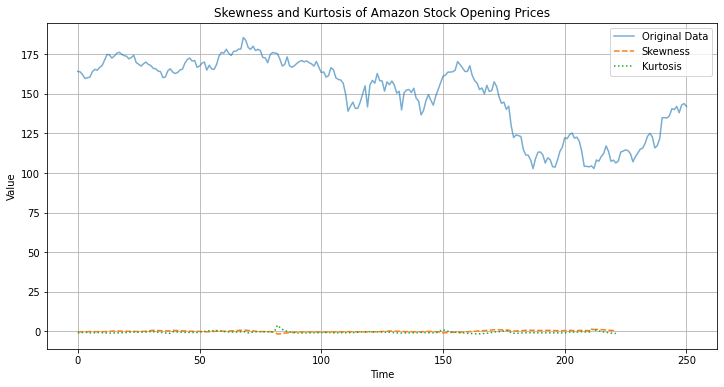

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load the data from AMZN.csv
df = pd.read_csv('D:\TUNI\Time series\AMZN.csv')

# Assuming that your CSV file has a column named 'Open' which contains the stock opening prices
data = df['Open']

# 1) Sliding window computation with skewness and kurtosis
window_size = 30  # Set your desired window size
skewness_values = []
kurtosis_values = []

for i in range(len(data) - window_size + 1):
    window = data[i:i + window_size]
    skewness_val = skew(window)
    kurtosis_val = kurtosis(window)

    skewness_values.append(skewness_val)
    kurtosis_values.append(kurtosis_val)

# 2) Explanation of skewness and kurtosis
# Skewness measures the asymmetry of the data distribution. Positive skew indicates a longer tail on the right side, while negative skew has a longer tail on the left.
# Kurtosis measures the tailedness or peakedness of the data distribution. High kurtosis indicates heavy tails, and low kurtosis indicates light tails.

# In time series analysis, skewness and kurtosis can help identify patterns in data. For example, sudden shifts in skewness might indicate changes in data distribution. Kurtosis can help identify outliers and heavy-tailed distributions, which might be of interest in finance to detect extreme market events.

# 3) Explanation of 'moment' function
# In Python, you can use the 'moment' function to compute moments of the data, which include mean, variance, skewness, kurtosis, and more. It provides a flexible way to calculate statistical moments.

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', alpha=0.6)
plt.plot(skewness_values, label='Skewness', linestyle='dashed')
plt.plot(kurtosis_values, label='Kurtosis', linestyle='dotted')
plt.legend()
plt.title('Skewness and Kurtosis of Amazon Stock Opening Prices')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


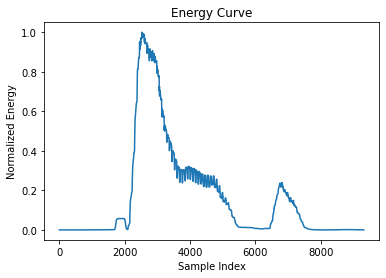

Start Index: 2227
End Index: 7203


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the time series data
sample_rate, data = wavfile.read(file_path) 

# Ensure data is in a single channel if it's stereo
if len(data.shape) == 2:
    data = data[:, 0]

# Define parameters
window_length = 300  # Change this value to test different window sizes
threshold = 0.2  # Adjust the threshold as needed

# Calculate the energy for each window
len2 = len(data)
en = np.zeros(len2 - window_length + 1)
for i in range(len2 - window_length + 1):
    window = data[i:i + window_length]
    en[i] = np.sum((window - np.mean(window)) ** 2)

# Normalize the energy curve to [0, 1]
en = (en - np.min(en)) / (np.max(en) - np.min(en))

# Plot the energy curve
plt.figure()
plt.plot(en)
plt.title('Energy Curve')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Energy')
plt.show()

# Perform segmentation based on energy
start_idx = np.argmax(en > threshold)
end_idx = len2 - np.argmax(en[::-1] > threshold) - 1

print(f'Start Index: {start_idx}')
print(f'End Index: {end_idx}')


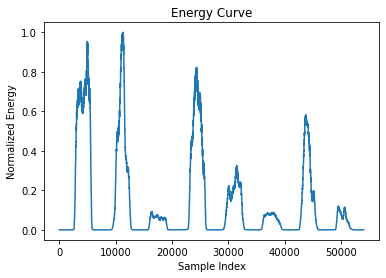

Segment 1: Start Index: 2790, End Index: 5663
Segment 2: Start Index: 9948, End Index: 12423
Segment 3: Start Index: 23119, End Index: 25855
Segment 4: Start Index: 29951, End Index: 29962
Segment 5: Start Index: 29977, End Index: 29999
Segment 6: Start Index: 30006, End Index: 30193
Segment 7: Start Index: 30771, End Index: 30782
Segment 8: Start Index: 30788, End Index: 30792
Segment 9: Start Index: 30797, End Index: 30821
Segment 10: Start Index: 30829, End Index: 30892
Segment 11: Start Index: 30894, End Index: 32288
Segment 12: Start Index: 43138, End Index: 44713


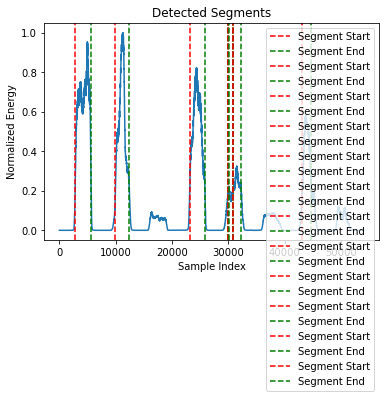

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio data

file_path2= r'D:\TUNI\Time series\vowels.wav'
sample_rate, data = wavfile.read(file_path2)  # Load your audio file here

# Ensure data is in a single channel if it's stereo
if len(data.shape) == 2:
    data = data[:, 0]

# Define parameters
window_length = 300  # Change this value to test different window sizes
threshold = 0.2  # Adjust the threshold as needed

# Calculate the energy for each window
len2 = len(data)
en = np.zeros(len2 - window_length + 1)
for i in range(len2 - window_length + 1):
    window = data[i:i + window_length]
    en[i] = np.sum((window - np.mean(window)) ** 2)

# Normalize the energy curve to [0, 1]
en = (en - np.min(en)) / (np.max(en) - np.min(en))

# Plot the energy curve
plt.figure()
plt.plot(en)
plt.title('Energy Curve')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Energy')
plt.show()

# Perform segmentation based on energy
start_indices = []
end_indices = []
segmenting = False
for i in range(len(en)):
    if en[i] > threshold and not segmenting:
        start_indices.append(i)
        segmenting = True
    elif en[i] <= threshold and segmenting:
        end_indices.append(i)
        segmenting = False

# Ensure that the number of starts and ends match
if len(start_indices) > len(end_indices):
    end_indices.append(len(data) - 1)

# Print the start and end indices for each segment
for segment_num, (start, end) in enumerate(zip(start_indices, end_indices)):
    print(f'Segment {segment_num + 1}: Start Index: {start}, End Index: {end}')

# Plot the detected segments
plt.figure()
plt.plot(en)
for start, end in zip(start_indices, end_indices):
    plt.axvline(start, color='r', linestyle='--', label='Segment Start')
    plt.axvline(end, color='g', linestyle='--', label='Segment End')
plt.legend()
plt.title('Detected Segments')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Energy')
plt.show()


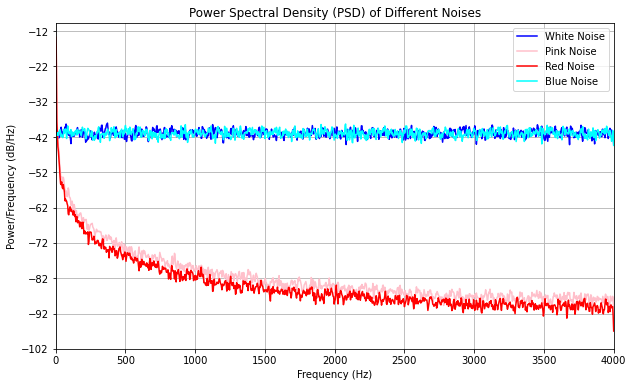

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# Parameters
duration = 5.0  # Duration of the noise signal in seconds
Fs = 8000  # Sampling frequency in Hz
n_samples = int(duration * Fs)

# Generate white noise
white_noise = np.random.uniform(-1, 1, n_samples)

# Define functions to generate pink, red, and blue noise
def pink_noise(n_samples):
    pink = np.cumsum(np.random.uniform(-1, 1, n_samples))
    pink = pink - np.mean(pink)
    pink = pink / max(abs(pink))
    return pink

def red_noise(n_samples):
    red = np.cumsum(np.random.uniform(-1, 1, n_samples))
    red = red - np.mean(red)
    red = red / max(abs(red))
    return red

def blue_noise(n_samples):
    blue = np.random.uniform(-1, 1, n_samples)
    blue = blue - np.mean(blue)
    blue = blue / max(abs(blue))
    return blue

# Generate pink, red, and blue noise
pink_noise_signal = pink_noise(n_samples)
red_noise_signal = red_noise(n_samples)
blue_noise_signal = blue_noise(n_samples)

# Save the noises to audio files
wavfile.write("white_noise.wav", Fs, (white_noise * 32767).astype(np.int16))
wavfile.write("pink_noise.wav", Fs, (pink_noise_signal * 32767).astype(np.int16))
wavfile.write("red_noise.wav", Fs, (red_noise_signal * 32767).astype(np.int16))
wavfile.write("blue_noise.wav", Fs, (blue_noise_signal * 32767).astype(np.int16))

# Plot the power spectral density (PSD) of the noises
plt.figure(figsize=(10, 6))
frequencies, Pxx_white = plt.psd(white_noise, NFFT=2048, Fs=Fs, color='blue', label='White Noise')
_, Pxx_pink = plt.psd(pink_noise_signal, NFFT=2048, Fs=Fs, color='pink', label='Pink Noise')
_, Pxx_red = plt.psd(red_noise_signal, NFFT=2048, Fs=Fs, color='red', label='Red Noise')
_, Pxx_blue = plt.psd(blue_noise_signal, NFFT=2048, Fs=Fs, color='cyan', label='Blue Noise')

plt.legend()
plt.title("Power Spectral Density (PSD) of Different Noises")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.xlim(0, 4000)  # Adjust the frequency range as needed
plt.show()



In [25]:
import numpy as np
import simpleaudio as sa

# Load the audio files you've generated
white_noise = np.int16(np.loadtxt("white_noise.wav"))
pink_noise = np.int16(np.loadtxt("pink_noise.wav"))
red_noise = np.int16(np.loadtxt("red_noise.wav"))
blue_noise = np.int16(np.loadtxt("blue_noise.wav"))

# Define the sampling frequencies
Fs_8000 = 8000
Fs_16000 = 16000

# Play the audio files at different sampling frequencies
play_obj_8000_white = sa.play_buffer(white_noise, 1, 2, Fs_8000)
play_obj_16000_white = sa.play_buffer(white_noise, 1, 2, Fs_16000)

play_obj_8000_pink = sa.play_buffer(pink_noise, 1, 2, Fs_8000)
play_obj_16000_pink = sa.play_buffer(pink_noise, 1, 2, Fs_16000)

play_obj_8000_red = sa.play_buffer(red_noise, 1, 2, Fs_8000)
play_obj_16000_red = sa.play_buffer(red_noise, 1, 2, Fs_16000)

play_obj_8000_blue = sa.play_buffer(blue_noise, 1, 2, Fs_8000)
play_obj_16000_blue = sa.play_buffer(blue_noise, 1, 2, Fs_16000)

# Wait for audio to finish playing
play_obj_8000_white.wait_done()
play_obj_16000_white.wait_done()
play_obj_8000_pink.wait_done()
play_obj_16000_pink.wait_done()
play_obj_8000_red.wait_done()
play_obj_16000_red.wait_done()
play_obj_8000_blue.wait_done()
play_obj_16000_blue.wait_done()


ModuleNotFoundError: No module named 'simpleaudio'

In [28]:
import sounddevice as sd

# Load the audio files you've generated
white_noise = (white_noise * 32767).astype('int16')
pink_noise = (pink_noise_signal * 32767).astype('int16')
red_noise = (red_noise_signal * 32767).astype('int16')
blue_noise = (blue_noise_signal * 32767).astype('int16')

# Define the sampling frequency
Fs1 = 8000
Fs2 = 16000

# Play the audio files at Fs=8000
print("Playing white noise at Fs=8000...")
sd.play(white_noise, Fs1)
sd.wait()

print("Playing pink noise at Fs=8000...")
sd.play(pink_noise, Fs1)
sd.wait()

print("Playing red noise at Fs=8000...")
sd.play(red_noise, Fs1)
sd.wait()

print("Playing blue noise at Fs=8000...")
sd.play(blue_noise, Fs1)
sd.wait()

# Play the audio files at Fs=16000
print("Playing white noise at Fs=16000...")
sd.play(white_noise, Fs2)
sd.wait()

print("Playing pink noise at Fs=16000...")
sd.play(pink_noise, Fs2)
sd.wait()

print("Playing red noise at Fs=16000...")
sd.play(red_noise, Fs2)
sd.wait()

print("Playing blue noise at Fs=16000...")
sd.play(blue_noise, Fs2)
sd.wait()

Playing white noise at Fs=8000...
Playing pink noise at Fs=8000...
Playing red noise at Fs=8000...
Playing blue noise at Fs=8000...
Playing white noise at Fs=16000...
Playing pink noise at Fs=16000...
Playing red noise at Fs=16000...
Playing blue noise at Fs=16000...


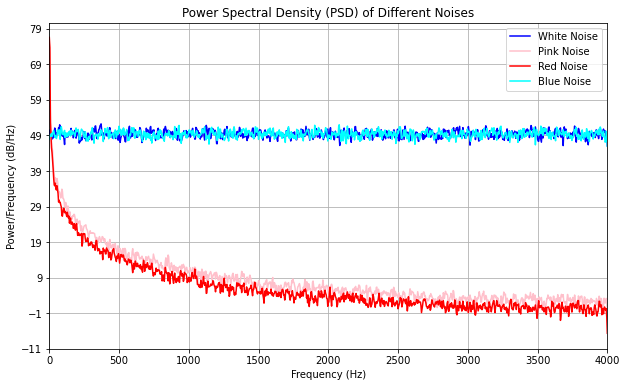

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# Load the audio files you've generated
white_noise = (white_noise * 32767).astype('int16')
pink_noise = (pink_noise_signal * 32767).astype('int16')
red_noise = (red_noise_signal * 32767).astype('int16')
blue_noise = (blue_noise_signal * 32767).astype('int16')

# Calculate the PSD for each noise type
plt.figure(figsize=(10, 6))

# White Noise
frequencies, Pxx_white = plt.psd(white_noise, NFFT=2048, Fs=Fs, color='blue', label='White Noise')

# Pink Noise
frequencies, Pxx_pink = plt.psd(pink_noise, NFFT=2048, Fs=Fs, color='pink', label='Pink Noise')

# Red Noise
frequencies, Pxx_red = plt.psd(red_noise, NFFT=2048, Fs=Fs, color='red', label='Red Noise')

# Blue Noise
frequencies, Pxx_blue = plt.psd(blue_noise, NFFT=2048, Fs=Fs, color='cyan', label='Blue Noise')

plt.legend()
plt.title("Power Spectral Density (PSD) of Different Noises")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
plt.xlim(0, 4000)  # Adjust the frequency range as needed
plt.grid(True)

plt.show()
